# Лабораторна робота №1
### з курсу "Машинне навчання"
ТВ-91 Гришкевич Максим

Варіант №3
Support Vector Machines, Diabetes dataset

1. Імпорт необхідних бібліотек

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score

2. Завантаження та оформлення згідно з документацією датасету про хворих на діабет

In [90]:
diabetes = datasets.load_diabetes()
data_x = pd.DataFrame(diabetes.data)
data_x.columns = ["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"]
data_y = pd.DataFrame(diabetes.target)
data_y.columns = ["progression"]
data = pd.merge(data_x, data_y, left_index=True, right_index=True)


Згідно з описом https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
- age - вік
- sex - стать
- bmi - індек маси тіла
- bp - середній артеріальний тиск
- tc - загального холестерину в сироватці крові
- ldl - ліпопротеїди низької щільності
- hdl - ліпопротеїди високої щільності
- tch - загальний холестерин / ЛПВЩ
- ltg - можлива затримка тригліцеридів у сироватці крові
- glu - рівень цукру в крові
- progression - кількісний показник прогресування захворювання через рік після вихідного рівня

In [91]:
data.head(5)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


3. Побудова кореляційної матриці

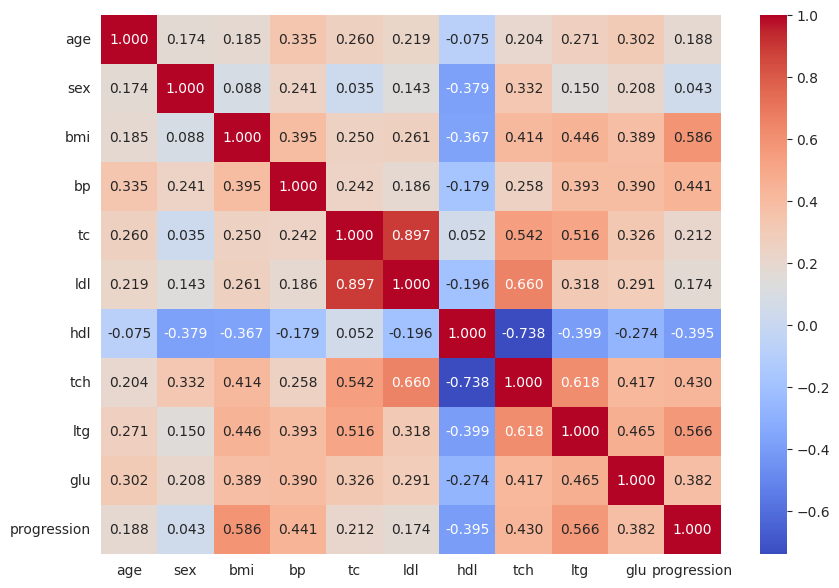

In [92]:
corr_mtx = data.corr()
plt.figure(figsize=(10, 7))
data_plt = sns.heatmap(corr_mtx, annot=True, fmt='.3f', cmap='coolwarm')

4. Побудова графіка розподілу кількості цукру у крові в залежності від індексу маси тіла та віку

<AxesSubplot: xlabel='glu', ylabel='bmi'>

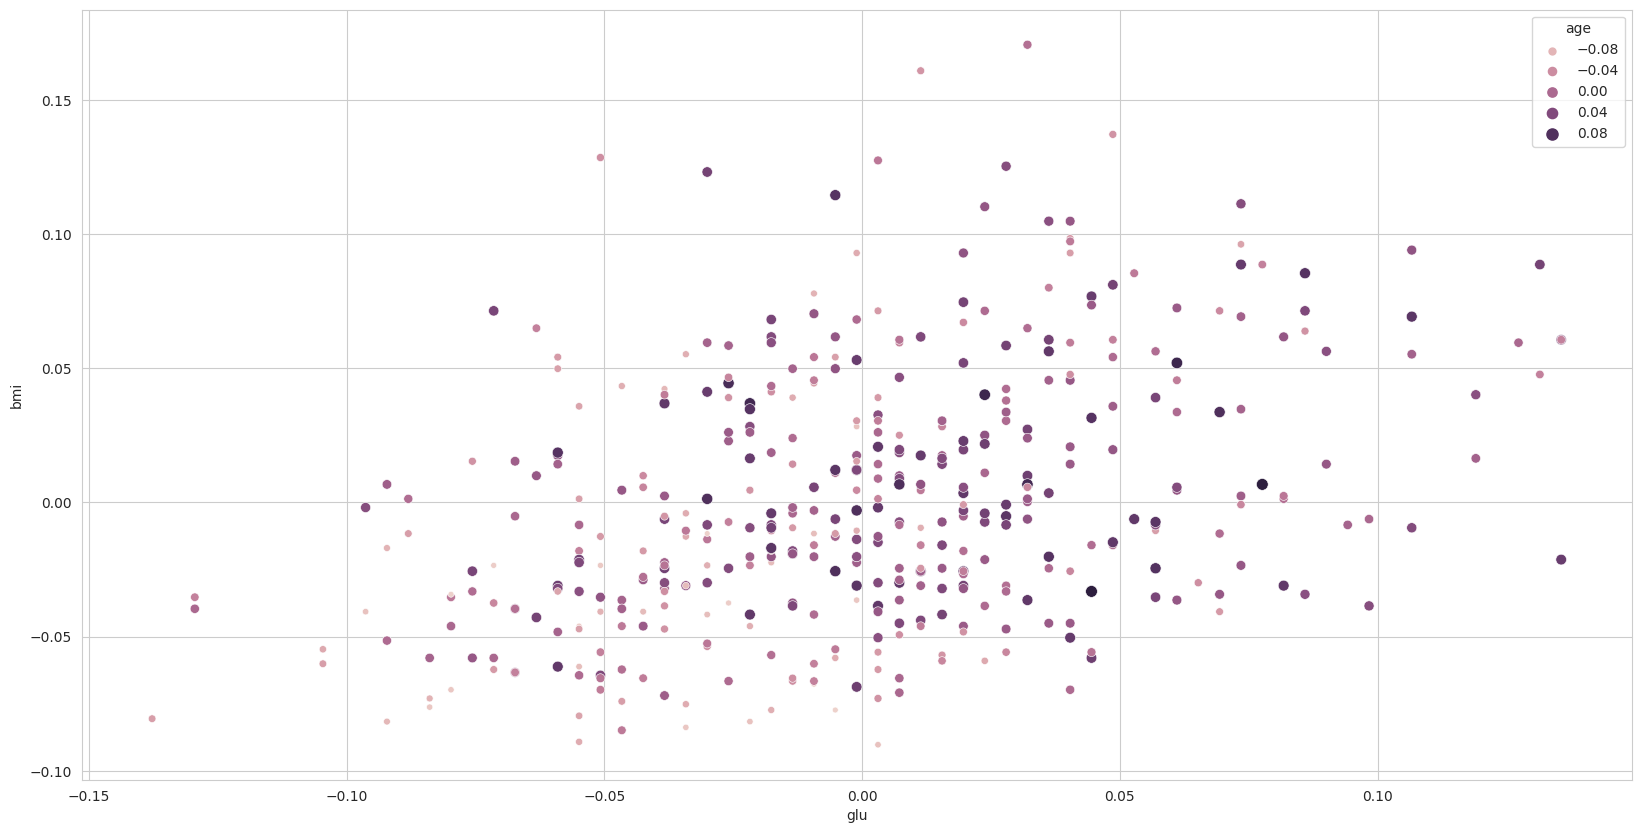

In [93]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x="glu", y="bmi", hue="age", size="age")

5. Ілюстрація кількості захворюваних в залежності від показників цукру в крові
Можна зробити висновок - чим ближче рівень цукру до 0, тим більше шансів мати діабет

<AxesSubplot: ylabel='glu'>

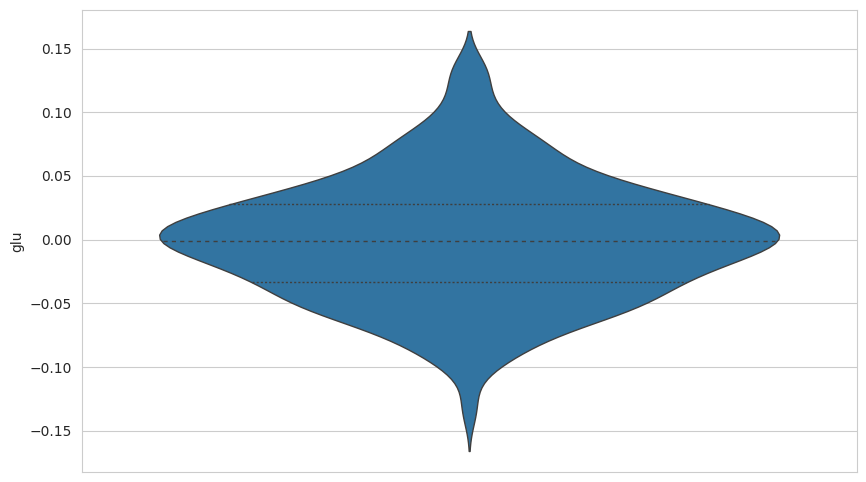

In [94]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data, y="glu",
               split=True, inner="quart", linewidth=1)

6. Розподіл наявних даних на тенувальні та тестові

In [95]:
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=42)

7. Тренування та тестування

In [96]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

8. Визначення абсолютної похибки при тестуванні

In [97]:
print("The mean absolute error:", mean_absolute_error(y_test, y_pred))
print("The mean squared error:", mean_squared_error(y_test, y_pred))
print("The max error:", max_error(y_test, y_pred))
print("The explained variance score:", explained_variance_score(y_test, y_pred))

The mean absolute error: 46.357142857142854
The mean squared error: 3495.690476190476
The max error: 152.0
The explained variance score: 0.4344752725113238


9. Графік актуальних та передбачених даних щодо прогресування діабету

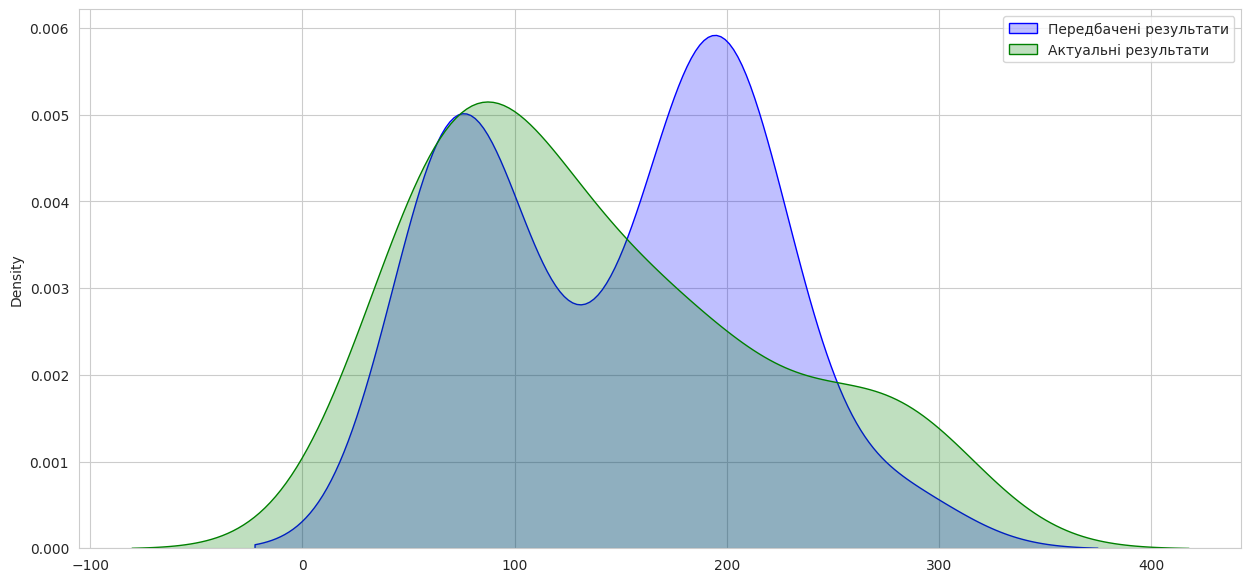

In [98]:
plt.figure(figsize=(15, 7))
ax = sns.kdeplot(y_pred, color="blue", label="Передбачені результати", fill="true")
sns.kdeplot(y_test, color="green", label="Актуальні результати", ax=ax, fill="true")
plt.legend()
plt.show()

Бачимо що результати є вкрай не стабільними. Тому спробуємо застосувати інший метод даної моделі.

The mean absolute error: 46.497459250696195
The mean squared error: 3296.6939889144387
The max error: 135.9842143024056
The explained variance score: 0.451512489671392


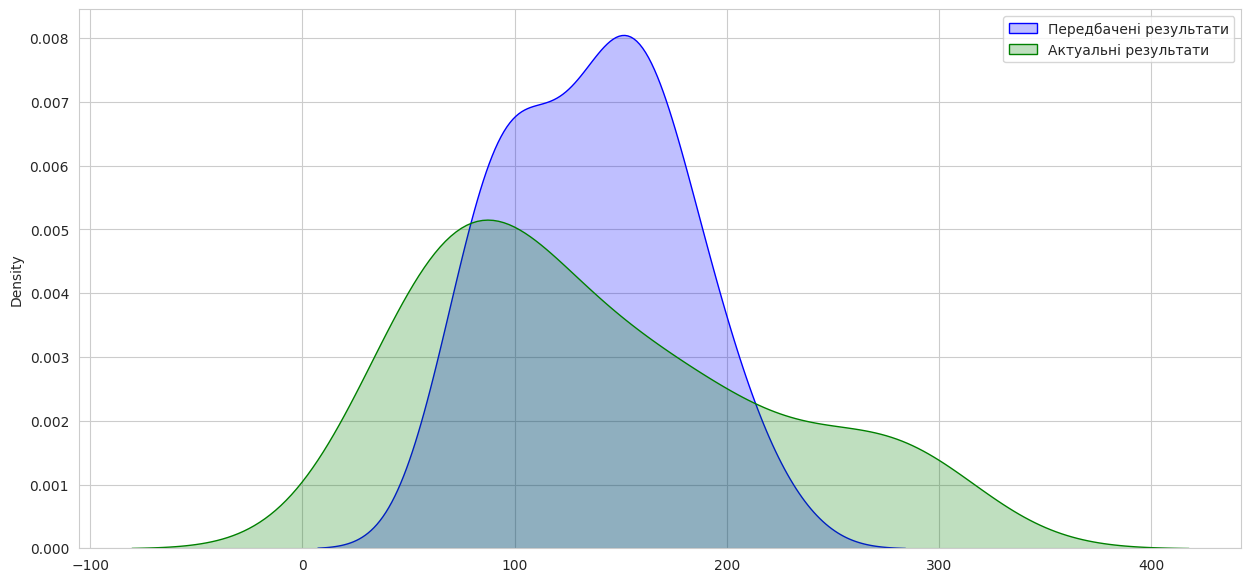

In [99]:
model = SVR(kernel="linear", C=100, gamma="auto")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("The mean absolute error:", mean_absolute_error(y_test, y_pred))
print("The mean squared error:", mean_squared_error(y_test, y_pred))
print("The max error:", max_error(y_test, y_pred))
print("The explained variance score:", explained_variance_score(y_test, y_pred))
plt.figure(figsize=(15, 7))
ax = sns.kdeplot(y_pred, color="blue", label="Передбачені результати", fill="true")
sns.kdeplot(y_test, color="green", label="Актуальні результати", ax=ax, fill="true")
plt.legend()
plt.show()

Отримали майже ті ж результати, тому можна зробити висновок,
що модель Support Vector Machine не зовсім підходить для виконання
поставленої задачі. Проте все може змінитись, якщо обрати датасет
більшого об'єму даних, збільшивши тренувальні дані.